In [135]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks


# If the CSV file is in Google Drive
# df = pd.read_csv('/content/drive/MyDrive/path/to/your/file.csv')

# If the CSV file is uploaded directly to Colab
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/PPG_Signal/p040019.csv')  # Replace 'file.csv' with the path to your CSV file
print(df.head())  # Display the first few rows of the DataFrame

sys = df['Mean_NBP_Sys'].values
dia = df['Mean_NBP_Dias'].values

print(sys, ' / ', dia)

columns_to_remove = ['Mean_NBP_Sys', 'Mean_NBP_Dias']
cleaned_df = df.drop(columns=columns_to_remove)

print(cleaned_df.head())

          0         1         2         3         4         5         6  \
0  0.388235  0.376471  0.364706  0.364706  0.372549  0.388235  0.407843   

          7         8        9  ...      4192      4193      4194      4195  \
0  0.431373  0.454902  0.47451  ...  0.631373  0.611765  0.596078  0.588235   

       4196      4197      4198      4199  Mean_NBP_Sys  Mean_NBP_Dias  
0  0.588235  0.592157  0.596078  0.596078    126.256098      65.792683  

[1 rows x 4202 columns]
[126.25609756]  /  [65.79268293]
          0         1         2         3         4         5         6  \
0  0.388235  0.376471  0.364706  0.364706  0.372549  0.388235  0.407843   

          7         8        9  ...      4190     4191      4192      4193  \
0  0.431373  0.454902  0.47451  ...  0.670588  0.65098  0.631373  0.611765   

       4194      4195      4196      4197      4198      4199  
0  0.596078  0.588235  0.588235  0.592157  0.596078  0.596078  

[1 rows x 4200 columns]


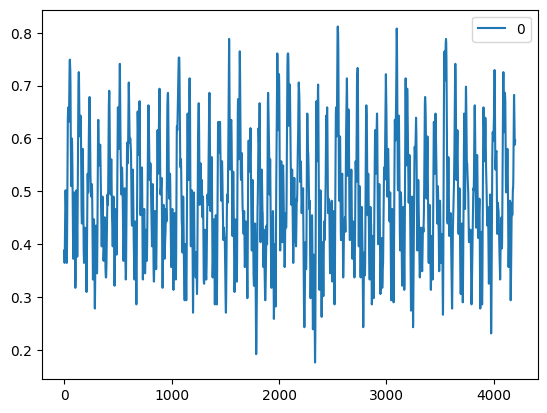

In [136]:
# Transpose the DataFrame
transposed_df = cleaned_df.T

# Plot a line graph of the transposed DataFrame
transposed_df.plot(kind='line')

# Display the plot
plt.show()

In [137]:
def find_peaks_in_data(data):
    """
    Find peaks in the data and plot them.

    Parameters:
    - data: DataFrame or Series with one row or transposed DataFrame

    Returns:
    - peaks: Dictionary containing indices and corresponding values of peaks
    """
    # Convert DataFrame or Series to numpy array
    values = data.values.flatten() if isinstance(data, pd.DataFrame) else data.values

    # Find peaks in the data
    peaks, _ = find_peaks(values)

    # Plot the data and highlight the peaks
    plt.plot(values, label='Data')
    plt.plot(peaks, values[peaks], 'ro', label='Peaks')
    plt.xlabel('Index')
    plt.ylabel('Value')
    plt.title('Peaks in Data')
    plt.legend()
    plt.show()

    # Return peaks as a dictionary containing indices and corresponding values
    peaks_dict = {'indices': peaks, 'values': values[peaks]}

    # Create a DataFrame containing peak values
    peak_values_df = pd.DataFrame({'Index': peaks, 'Value': values[peaks]})

    return peaks_dict, peak_values_df

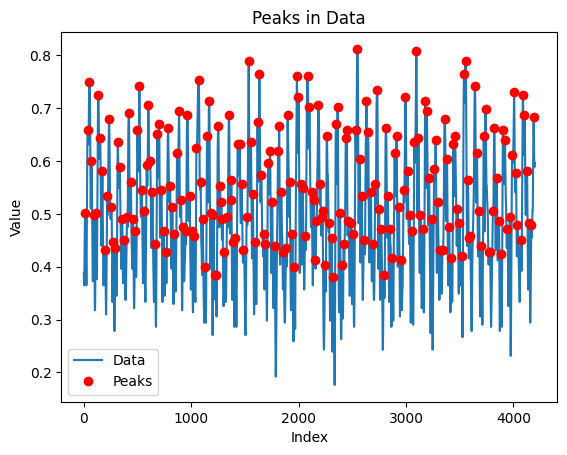

{'indices': array([  12,   36,   51,   71,   93,  113,  135,  152,  172,  193,  218,
        235,  257,  275,  294,  316,  334,  356,  376,  402,  419,  438,
        458,  479,  499,  517,  538,  562,  585,  601,  614,  639,  661,
        683,  701,  723,  744,  761,  784,  802,  824,  843,  869,  886,
        905,  924,  947,  965,  985, 1006, 1027, 1049, 1068, 1087, 1107,
       1128, 1148, 1167, 1187, 1207, 1219, 1230, 1252, 1269, 1280, 1291,
       1310, 1334, 1351, 1366, 1373, 1393, 1411, 1434, 1450, 1469, 1486,
       1517, 1535, 1554, 1573, 1595, 1618, 1634, 1652, 1674, 1691, 1716,
       1734, 1754, 1776, 1809, 1819, 1838, 1859, 1883, 1898, 1917, 1943,
       1961, 1983, 1999, 2020, 2037, 2060, 2083, 2100, 2121, 2142, 2154,
       2165, 2183, 2202, 2216, 2224, 2245, 2263, 2284, 2307, 2323, 2348,
       2363, 2385, 2406, 2419, 2440, 2448, 2461, 2490, 2506, 2531, 2546,
       2568, 2588, 2613, 2632, 2647, 2673, 2690, 2713, 2732, 2750, 2770,
       2793, 2813, 2830, 2851, 2872, 28

In [138]:
peaks, peak_values_df = find_peaks_in_data(transposed_df)
print(peaks)
print(peak_values_df)

In [146]:
def remove_close_values_df(df, threshold=0.17):
    """
    Remove rows from a DataFrame where the difference between consecutive values is less than the specified threshold.

    Parameters:
    - df: DataFrame
    - threshold: float, minimum difference required to keep a value (default: 0.2)

    Returns:
    - filtered_df: DataFrame with close values removed
    """
    filtered_df = df.iloc[:1]  # Start with the first row

    for i in range(1, len(df)):
        if abs(df.iloc[i]['Value'] - filtered_df.iloc[-1]['Value']) >= threshold:
            filtered_df = pd.concat([filtered_df, df.iloc[[i]]], ignore_index=True)

    return filtered_df


# Example usage
filtered_df = remove_close_values_df(peak_values_df)
print(filtered_df)

    Index     Value
0      12  0.501961
1      51  0.749020
2      93  0.498039
3     135  0.725490
4     193  0.431373
..    ...       ...
58   4007  0.729412
59   4038  0.478431
60   4089  0.725490
61   4149  0.482353
62   4189  0.682353

[63 rows x 2 columns]


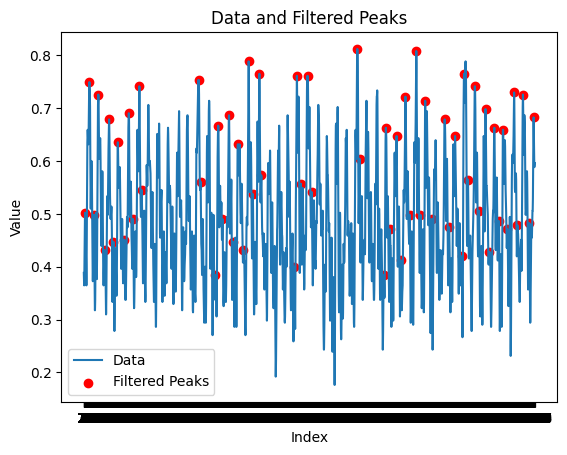

In [147]:
# Plot transposed_df as a line plot
plt.plot(transposed_df.index, transposed_df.values.flatten(), label='Data')

# Plot filtered_df as a scatter plot with dots
plt.scatter(filtered_df['Index'], filtered_df['Value'], color='red', label='Filtered Peaks')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Data and Filtered Peaks')
plt.legend()

# Show plot
plt.show()

In [151]:
def split_values_high_low(filtered_df, threshold=0.6):
    """
    Split values in filtered_df into two arrays based on the specified threshold for high values.

    Parameters:
    - filtered_df: DataFrame containing filtered values
    - threshold: float, minimum value required to be considered as high (default: 0.6)

    Returns:
    - high_values: list of high values (greater than or equal to threshold)
    - low_values: list of low values (less than threshold)
    """
    high_values = []
    low_values = []

    for value in filtered_df['Value']:
        if value >= threshold:
            high_values.append(value)
            low_values.append(None)  # Placeholder for low value
        else:
            high_values.append(None)  # Placeholder for high value
            low_values.append(value)

    return high_values, low_values



high_values, low_values = split_values_high_low(filtered_df)
print(high_values)
print(low_values)


[None, 0.7490196078431373, None, 0.7254901960784313, None, 0.6784313725490196, None, 0.6352941176470588, None, 0.6901960784313725, None, 0.7411764705882353, None, 0.7529411764705882, None, None, 0.6666666666666666, None, 0.6862745098039216, None, 0.6313725490196078, None, 0.788235294117647, None, 0.7647058823529411, None, None, 0.7607843137254902, None, 0.7607843137254902, None, 0.8117647058823529, 0.6039215686274509, None, 0.6627450980392157, None, 0.6470588235294118, None, 0.7215686274509804, None, 0.807843137254902, None, 0.7137254901960784, None, 0.6784313725490196, None, 0.6470588235294118, None, 0.7647058823529411, None, 0.7411764705882353, None, 0.6980392156862745, None, 0.6627450980392157, None, 0.6588235294117647, None, 0.7294117647058823, None, 0.7254901960784313, None, 0.6823529411764706]
[0.5019607843137255, None, 0.4980392156862745, None, 0.4313725490196078, None, 0.4470588235294118, None, 0.4509803921568627, None, 0.4901960784313725, None, 0.5450980392156862, None, 0.5607

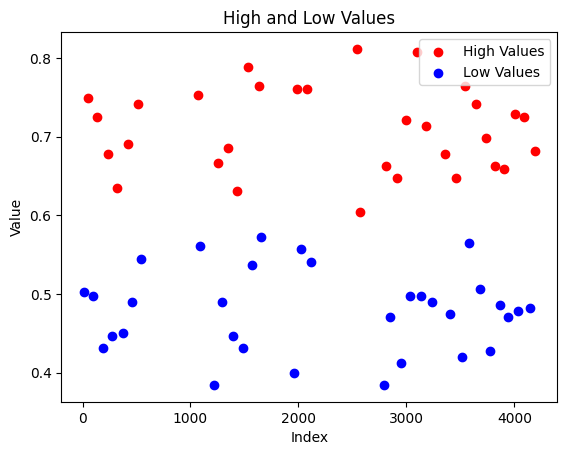

In [152]:
# Plot high values
plt.scatter(filtered_df['Index'], high_values, color='red', label='High Values')

# Plot low values
plt.scatter(filtered_df['Index'], low_values, color='blue', label='Low Values')

# Add labels and title
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('High and Low Values')
plt.legend()

# Show plot
plt.show()


In [153]:
# Calculate the average of high values
average_high = np.mean([value for value in high_values if value is not None])

# Calculate the average of low values
average_low = np.mean([value for value in low_values if value is not None])

print("Average High Value:", average_high)
print("Average Low Value:", average_low)



Average High Value: 0.7092979127134729
Average Low Value: 0.479656862745098
